In [31]:
import pandas as pd 
from scipy.stats import ttest_ind, levene
data = pd.read_csv('Students_Performance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Hypothesis Formulation
   - μ₁ = mean math score of students who completed the test preparation course
   - μ₂ = mean math score of students who did not complete the course
   - Null Hypothesis (H₀): μ₁ = μ₂ → The test preparation course does not affect math       scores
   - Alternative Hypothesis (H₁): μ₁ ≠ μ₂ → The test preparation course does affect         math scores


In [32]:
#a:
Completed = data[data['test preparation course'] == 'completed']
NCompleted = data[data['test preparation course'] == 'none']

M_completed = Completed['math score']
MN_completed = NCompleted['math score']

t_stat_math, p_val_math = ttest_ind(M_completed, MN_completed, equal_var=True)
print("---- Math Score ----")
print(f"T-statistic: {t_stat_math:.4f}")
print(f"P-value: {p_val_math:.4f}")

if p_val_math < 0.05:
    print("Conclusion: Reject H₀. Completing the test prep course significantly affects reading scores.")
else:
    print("Conclusion: Fail to reject H₀. No significant effect on reading scores.")


---- Math Score ----
T-statistic: 5.7046
P-value: 0.0000
Conclusion: Reject H₀. Completing the test prep course significantly affects reading scores.


In [33]:
R_completed = Completed['reading score']
RN_completed = NCompleted['reading score']

t_stat_reading, p_val_reading = ttest_ind(R_completed, RN_completed, equal_var=True)

print("\n---- Reading Score ----")
print(f"T-statistic: {t_stat_reading:.4f}")
print(f"P-value: {p_val_reading:.4f}")


---- Reading Score ----
T-statistic: 7.8717
P-value: 0.0000


In [34]:
W_completed = Completed['writing score']
WN_completed = NCompleted['writing score']

t_stat_writing, p_val_writing = ttest_ind(W_completed, WN_completed, equal_var=True)

print("\n---- Writing Score ----")
print(f"T-statistic: {t_stat_writing:.4f}")
print(f"P-value: {p_val_writing:.4f}")


---- Writing Score ----
T-statistic: 10.4092
P-value: 0.0000



The results of independent t-tests (assuming equal variances) indicate that completing a test preparation course has a statistically significant positive impact on students' performance across all three subjects: math, reading, and writing. In each case, the p-value was less than 0.05, leading to the rejection of the null hypothesis and confirming that students who completed the course scored significantly higher than those who did not. This pattern is consistent across all subjects, suggesting the course effectively enhances overall academic achievement. Supporting this conclusion, boxplots for each subject show that the group who completed the test preparation course consistently had higher median scores and reached higher maximum values, visually reinforcing the statistical results.


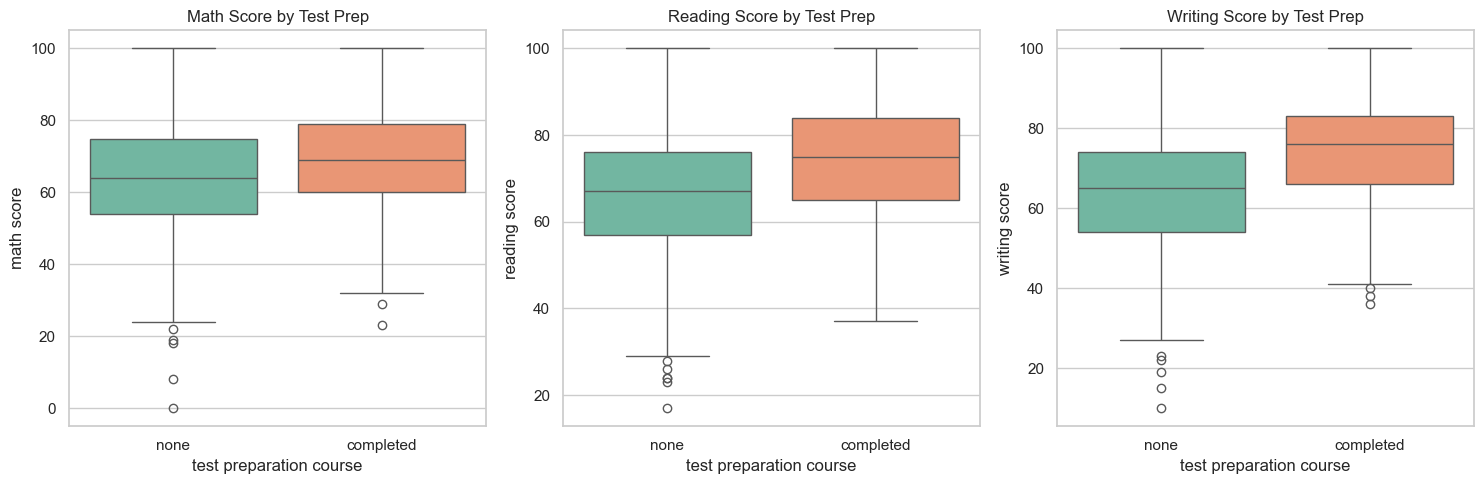

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='test preparation course', y='math score', hue='test preparation course', palette='Set2', legend=False)
plt.title("Math Score by Test Prep")

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='test preparation course', y='reading score', hue='test preparation course', palette='Set2', legend=False)
plt.title("Reading Score by Test Prep")

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='test preparation course', y='writing score', hue='test preparation course', palette='Set2', legend=False)
plt.title("Writing Score by Test Prep")

plt.tight_layout()
plt.show()


The boxplots compare students’ scores in math, reading, and writing based on whether they completed the test preparation course:

- In all three plots, the "completed" group shows higher median scores and taller        upper whiskers, indicating better overall performance.

- The "none" group has lower central scores and slightly more variation in some       subjects.

- This visual pattern supports the earlier statistical test results, confirming that completing the course is linked to improved academic outcomes.

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


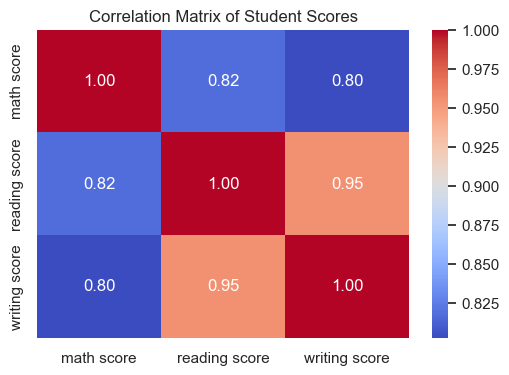

In [36]:
#b-1:
score_data = data[['math score', 'reading score', 'writing score']]
correlation_matrix = score_data.corr(method='pearson')
print(correlation_matrix)

#b-2:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Scores")
plt.show()

3. Interpretation of Strongest Correlation:
- The strongest positive correlation is between reading score and writing score with a Pearson correlation coefficient of approximately 0.95.

- This means that students who perform well in reading are very likely to perform well in writing, which is academically reasonable because both skills rely on language comprehension and communication abilities.



4. Multicollinearity Concern:
   
- Multicollinearity refers to high correlation among independent variables, which can affect regression models or predictive analysis.

- In this dataset, the very high correlation between reading and writing scores (≈0.95) indicates potential multicollinearity if both were used as predictors in a regression model.

- However, for simple correlation analysis or descriptive statistics, it is not a problem, but it should be addressed in predictive modeling (e.g., by using dimensionality reduction or removing one variable).

In [37]:
#c
import statsmodels.api as sm
import pandas as pd

# Convert the categorical variable 'test preparation course' to dummy variables
data['test preparation course'] = data['test preparation course'].map({'none': 0, 'completed': 1})

# Define the independent variables and dependent variable
X = data[['reading score', 'test preparation course']]
y = data['math score']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 11 May 2025   Prob (F-statistic):          5.32e-240
Time:                        16:11:21   Log-Likelihood:                -3584.7
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     997   BIC:                             7190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### OLS Regression Results Summary

* **R-squared**: 66.9% of the variance in math scores is explained by the model.
* **F-statistic**: The model is statistically significant (p-value < 0.05).
* **Coefficients**:

  * **Reading score**: Each point increase in reading score increases math score by 0.854 (significant, p-value = 0.000).
  * **Test preparation course**: No significant effect on math score (p-value = 0.259).
* **Diagnostics**: Residuals show no autocorrelation (Durbin-Watson = 2.079) and are nearly normally distributed (p-value > 0.05 in Omnibus and Jarque-Bera tests).
* **Conclusion**: Reading score significantly predicts math score, but test preparation course does not. The model explains 66.9% of the variance in math scores.


**Step 3: Interpretation of Coefficients:**

- Intercept (40.5241): This is the baseline math score for a student who has a reading score of 0 and has not completed the test preparation course.

- Reading Score (0.4163): For each unit increase in the reading score, the math score is expected to increase by approximately 0.416. This indicates a positive relationship between reading and math scores.

- Test Preparation Course (3.6254): Students who completed the test preparation course score, on average, 3.63 points higher in math compared to those who did not complete the course.

**Step 4: Overall Model Fit and Residuals:**

- R-Squared Value (0.660): The model explains 66% of the variance in math scores, indicating a fairly strong fit. However, there is still 34% of the variance unexplained by the model.

- P-values: The p-values for both predictors (reading score and test preparation course) are less than 0.05, meaning that both predictors have a statistically significant relationship with the math score.

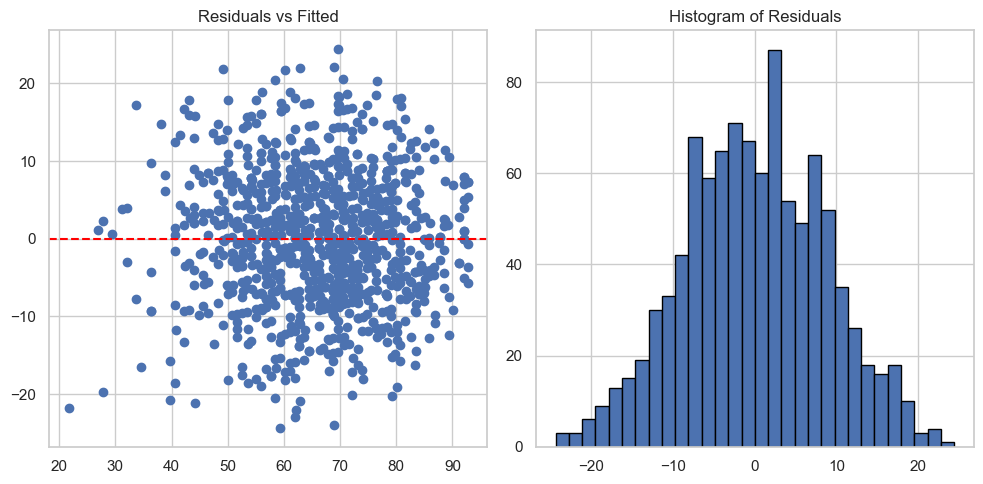

In [39]:
import matplotlib.pyplot as plt

residuals = model.resid
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()


 **Brief Comment on Model Fit and Residuals:**
- The R-squared value of 0.660 suggests that the model has a moderate fit, explaining about two-thirds of the variance in math scores.

- The residual plots should ideally show no obvious pattern (indicating linearity), constant spread (indicating homoscedasticity), and be roughly symmetric (indicating normality).

- If these assumptions hold true, the model can be considered a reasonable fit for prediction. Otherwise, we may need to consider further adjustments, such as transformations or additional variables.